# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single DataFrame
df_combined = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

df_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
df_combined["Mouse ID"].nunique()

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_combined.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head()

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
dtype: int64

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df_combined["Mouse ID"] == "g989"
df_combined.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df_combined["Mouse ID"] != "g989"
df_combined2 = df_combined.loc[mask].reset_index(drop=True)
df_combined2.shape

(1880, 8)

In [12]:
# Checking the number of mice in the clean DataFrame.
df_combined2["Mouse ID"].nunique()

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = df_combined2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = df_combined2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_sem = df_combined2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_std = df_combined2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_var = df_combined2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

data = {
    "Tumor Average": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor SEM": tumor_sem,
    "Tumor Volume Std. Dev": tumor_std,
    "Tumor Volume Variance": tumor_var
}

leaderboard = pd.DataFrame(data).reset_index()
leaderboard

,Drug Regimen,Tumor Average,Tumor Median,Tumor SEM,Tumor Volume Std. Dev,Tumor Volume Variance
0,Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
1,Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
2,Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
3,Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
4,Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
5,Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
6,Propriva,52.320930,50.446266,0.544332,6.622085,43.852013
7,Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
8,Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562
9,Zoniferol,53.236507,51.818479,0.516398,6.966589,48.533355


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}

leaderboard2 = df_combined2.groupby("Drug Regimen").agg(cols_agg).reset_index()
leaderboard2


Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

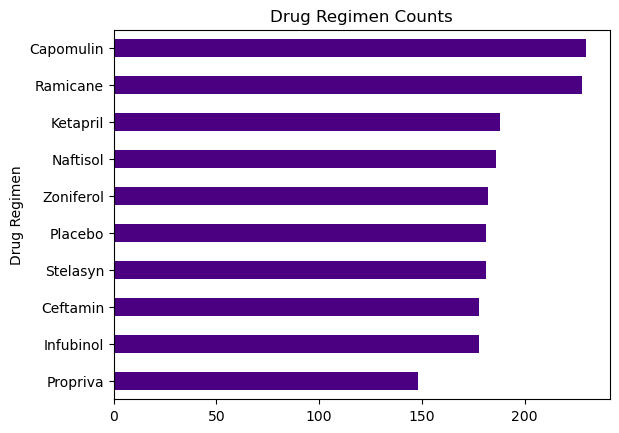

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_combined2["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="indigo")
plt.show()

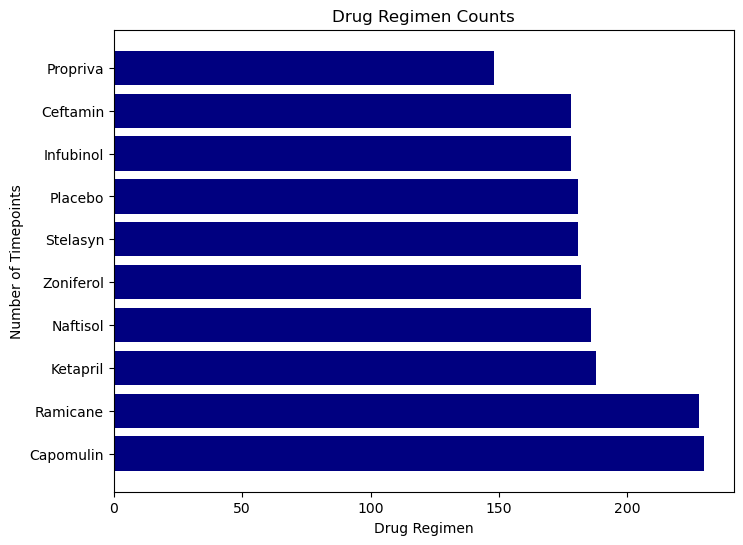

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df_combined2["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)

plt.figure(figsize=(8, 6))
plt.barh(x, y, color='navy')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Drug Regimen Counts')

plt.show()


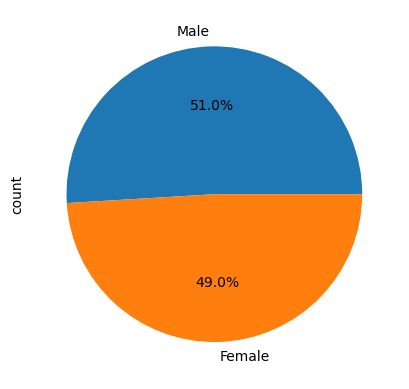

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = df_combined2.Sex.value_counts()
counts.plot(kind='pie', autopct = '%1.1f%%')
plt.show()

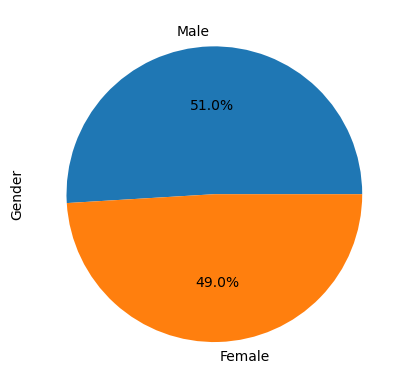

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values,labels=counts.index.values, autopct = '%1.1f%%')
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = df_combined2.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(df_combined2, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')

(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


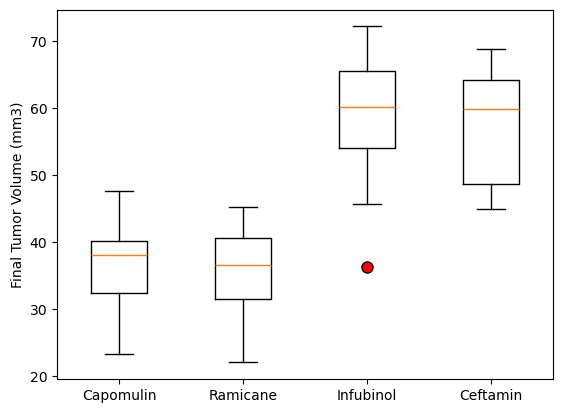

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_red = dict(markerfacecolor='red',markersize=8)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=outlier_red)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

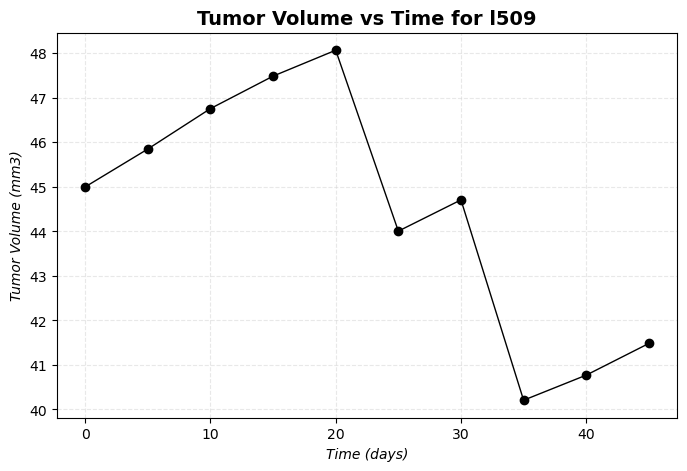

In [68]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_combined2.loc[df_combined2["Drug Regimen"] == "Capomulin"]

mouse = 'l509'

data = df_combined2.loc[df_combined2["Mouse ID"] == mouse]

time = data["Timepoint"]
y = data["Tumor Volume (mm3)"]

plt.figure(figsize=(8, 5))
plt.plot(time, y, color="black", linewidth=1, marker="o", markersize=6)
plt.xlabel("Time (days)", fontsize=10, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontstyle="italic")
plt.title(f"Tumor Volume vs Time for {mouse}", fontsize=14, fontweight="bold")
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

plt.show()

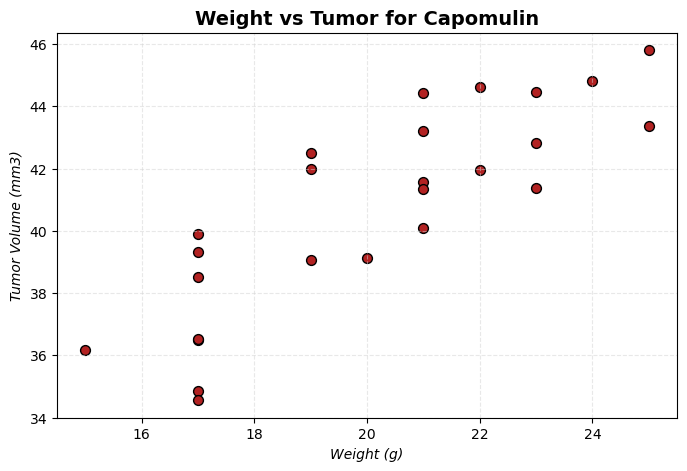

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df_combined2.loc[df_combined2["Drug Regimen"] == "Capomulin"]

df4 = data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

x = df4["Weight (g)"]
y = df4["Tumor Volume (mm3)"]

# Step 2: Make the canvas
plt.figure(figsize=(8, 5))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=50)

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=10, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=14)


plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [71]:
#Modelling libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [72]:
corrs = df4.corr(numeric_only = True)
corrs

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


y = 0.95x + 21.55
The r-squared is: 0.7088568047708723


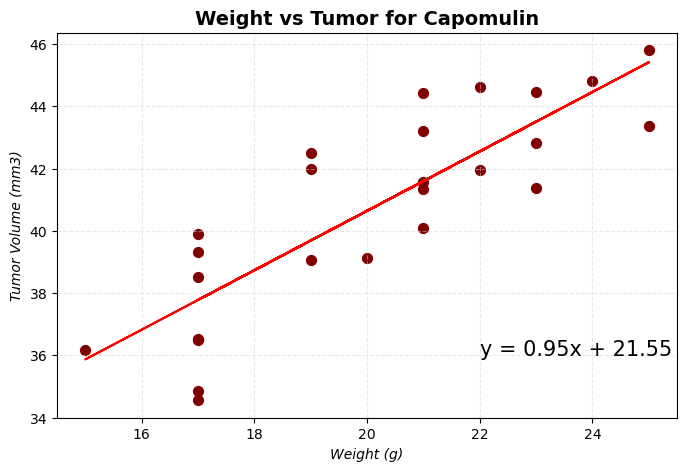

In [78]:
x_values = df4["Weight (g)"]
y_values = df4["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

#Make the canvas
plt.figure(figsize=(8, 5))

#Make the basic plot
plt.scatter(x_values, y_values, facecolor="maroon", edgecolor="maroon", s=50)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Weight (g)", fontsize=10, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=14)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="black")

print(f"The r-squared is: {rvalue**2}")
plt.show()